In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Provided Tables/final_df.csv')

In [3]:
df.sample(5)

,Unnamed: 0,subject_id,hadm_id,admittime,dischtime,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,...,drg_type,drg_code,description,drg_severity,drg_mortality,age,next_admittime,days_to_readmit,procedure_pairs,lab_events
5788,5788,18988,110978,2177-10-23 18:01:00,2177-10-29 10:06:00,EMERGENCY,DEAD/EXPIRED,WHITE,"[99254, 99261, 99263, 99291, '94002', '94003']","4417,496,30500,4280,78551,4019,V1259,412,3051",...,HCFA,130.0,"PERIPHERAL, VASCULAR DISORDERS WITH COMPLICATI...",NaN,NaN,84.0,NaN,NaN,"[(1, 9604), (2, 9671), (3, 8892), (4, 8844), (...","[(50800, 'ART', 'normal', 3.66), (50817, '94',..."
13695,13695,95170,134809,2119-01-03 16:49:00,2119-01-10 14:19:00,EMERGENCY,REHAB/DISTINCT PART HOSP,WHITE,"[99232, 99233, 99231, 99221, 99255]","4280,42731,92232,9222,8730,E8120,E9352,4589,27...",...,APR,1353.0,Major Chest & Respiratory Trauma,3.0,4.0,68.0,NaN,NaN,"[(1, 9904), (2, 9905)]","[(50803, '24', 'normal', 6.9), (50805, '2.4', ..."
12286,12286,75326,107058,2178-03-12 08:50:00,2178-03-12 19:15:00,EMERGENCY,HOME,HISPANIC OR LATINO,['99291'],"9951,5856,40391,185,4280,E9429,25000,41401,473...",...,APR,8113.0,Allergic Reactions,3.0,3.0,69.0,NaN,NaN,NaN,"[(50868, '19', 'normal', 0.32), (50882, '23', ..."
1760,1760,6005,161936,2138-12-15 17:26:00,2139-01-16 13:40:00,EMERGENCY,REHAB/DISTINCT PART HOSP,WHITE,"[99254, 99231, 99253, '94003', '94002']","85102,43491,51881,48241,5849,2851,53649,2874,8...",...,HCFA,541.0,ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATI...,NaN,NaN,83.0,2139-01-16 22:31:00,0.36875,"[(1, 3174), (2, 311), (3, 9672), (4, 2171), (5...","[(50931, '108', 'abnormal', 16.44), (50952, '4..."
3056,3056,10288,121203,2161-11-08 23:36:00,2161-12-06 12:00:00,EMERGENCY,DEAD/EXPIRED,WHITE,"[99291, 76937, 36556, 99223, 99232, '94003', '...","56212,5672,1125,41071,5185,0388,99831,4280,584...",...,HCFA,148.0,MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMP...,NaN,NaN,NaN,NaN,NaN,"[(1, 4575), (2, 4611), (3, 4319), (4, 5472), (...","[(50808, '1.06', 'abnormal', 12.91), (50813, '..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14040 entries, 0 to 14039
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14040 non-null  int64  
 1   subject_id          14040 non-null  int64  
 2   hadm_id             14040 non-null  int64  
 3   admittime           14040 non-null  object 
 4   dischtime           14040 non-null  object 
 5   admission_type      14040 non-null  object 
 6   discharge_location  14040 non-null  object 
 7   ethnicity           14040 non-null  object 
 8   cpt_cd              12806 non-null  object 
 9   all_diagnosis       14040 non-null  object 
 10  gender              14040 non-null  object 
 11  dob                 14040 non-null  object 
 12  dod                 8641 non-null   object 
 13  drg_type            14038 non-null  object 
 14  drg_code            14038 non-null  float64
 15  description         14038 non-null  object 
 16  drg_

In [5]:
df = df[['admission_type',
        'discharge_location',
        'ethnicity',
        'cpt_cd',
        'all_diagnosis',
        'gender',
        'drg_type',
        'drg_code',
        'description',
        'drg_severity',
        'drg_mortality',
        'age',
        'procedure_pairs',
        'lab_events',
        'days_to_readmit']]

In [6]:
df.sample(5)

,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,gender,drg_type,drg_code,description,drg_severity,drg_mortality,age,procedure_pairs,lab_events,days_to_readmit
3354,ELECTIVE,HOME HEALTH CARE,WHITE,"[99222, 99238]","4280,496,42731,4148,412,5939,2859,V4581",M,APR,1692.0,Major Thoracic & Abdominal Vascular Procedures,2.0,2.0,83.0,"[(1, 3799), (2, 52), (3, 8949), (4, 481)]","[(51279, '3.27', 'abnormal', 5.24), (51301, '1...",NaN
13277,EMERGENCY,DEAD/EXPIRED,WHITE,"['99223', '99232', '99231', '99233', '99222', ...","4321,43491,5070,51881,42823,34831,70704,2762,6...",M,APR,444.0,Intracranial Hemorrhage,4.0,4.0,NaN,"[(1, 9671), (2, 3897), (3, 3897), (4, 9915), (...","[(51277, '16.5', 'abnormal', 8.47), (51279, '4...",NaN
6060,EMERGENCY,SNF,BLACK/AFRICAN AMERICAN,"['99222', '99255', '90935', '99291', '99232', ...","7907,99662,04119,99673,99811,9984,2851,40391,5...",M,APR,7244.0,Other Infectious & Parasitic Diseases,4.0,3.0,64.0,"[(1, 3995), (2, 9904), (3, 9907), (4, 3893), (...","[(51233, '2+', 'normal', 8.11), (50979, 'HOLD'...",75.932639
9042,EMERGENCY,HOME,BLACK/AFRICAN AMERICAN,"['99223', '99232', '99291', '99292', '99233', ...","56212,2851,42822,2762,41189,2875,V4582,412,401...",M,APR,9503.0,Extensive Procedure Unrelated To Principal Dia...,3.0,3.0,75.0,"[(1, 3979), (2, 8847), (3, 4523), (4, 4921)]","[(50868, '15', 'normal', 12.09), (50882, '23',...",NaN
9718,ELECTIVE,HOME HEALTH CARE,WHITE,"['33405', '99291', '99232', 94003]","4241,42831,44771,79902,2511,E9323,4280,45829,4...",F,APR,1633.0,Cardiac Valve Procedures w/o Cardiac Catheteri...,3.0,2.0,69.0,"[(1, 3521), (2, 3959), (3, 3961)]","[(50808, '1.19', 'normal', 4.0), (50809, '127'...",NaN


In [7]:
df.shape

(14040, 15)

In [8]:
df['days_to_readmit'].isnull().sum()

9680

In [9]:
df.describe()

,drg_code,drg_severity,drg_mortality,age,days_to_readmit
count,14038.000000,9756.000000,9756.000000,12697.000000,4360.000000
mean,2006.806668,3.477757,3.277060,69.743955,301.284445
std,2201.576128,0.639401,0.756595,13.084713,523.787013
min,1.000000,1.000000,1.000000,0.000000,-18.765278
25%,416.000000,3.000000,3.000000,62.000000,14.279514
50%,1633.000000,4.000000,3.000000,72.000000,65.049306
75%,2072.000000,4.000000,4.000000,80.000000,348.368576
max,9524.000000,4.000000,4.000000,110.000000,3969.602778


# Data Preprocessing

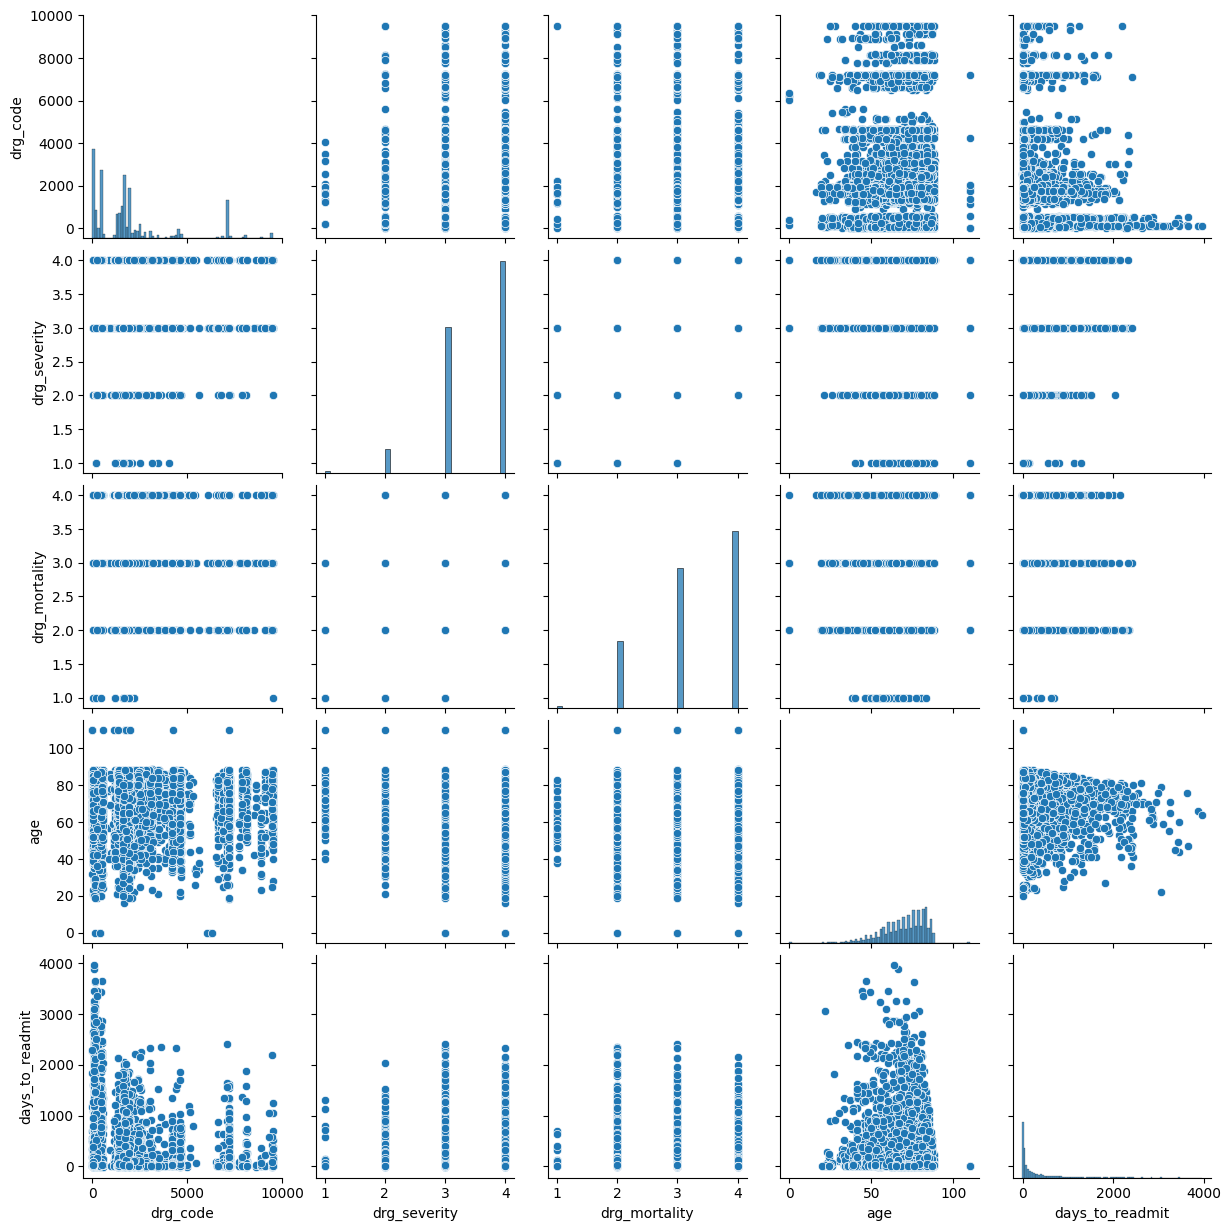

In [10]:
import seaborn as sns
sns.pairplot(df)

In [11]:
#fixing days_to_readmit for negative values
df[df['days_to_readmit'] < 0].shape

(63, 15)

In [12]:
#Removing these 65 rows
df = df[(df['days_to_readmit'].isna()) | (df['days_to_readmit'] >= 0)]

In [13]:
df['readmit_within_30'] = df['days_to_readmit'].apply(lambda x: 1 if pd.notna(x) and x < 30 else 0)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/3559373028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmit_within_30'] = df['days_to_readmit'].apply(lambda x: 1 if pd.notna(x) and x < 30 else 0)


In [14]:
df.sample(5)

,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,gender,drg_type,drg_code,description,drg_severity,drg_mortality,age,procedure_pairs,lab_events,days_to_readmit,readmit_within_30
10958,EMERGENCY,LONG TERM CARE HOSPITAL,BLACK/AFRICAN AMERICAN,"['99291', '99233', 94002, 94003]","42833,51881,486,00845,42732,5180,4280,79902,40...",F,APR,1944.0,Heart Failure,4.0,4.0,73.0,NaN,"[(50868, '20', 'normal', 2.85), (50882, '21', ...",NaN,0
7818,EMERGENCY,DEAD/EXPIRED,WHITE,"[99255, 99291, 36556, 31645, 31646, 99233, 992...","03842,78552,4271,70703,51881,4280,5180,5845,78...",M,APR,7204.0,Septicemia & Disseminated Infections,4.0,4.0,68.0,"[(1, 9672), (2, 14), (3, 5491), (4, 3324), (5,...","[(51233, 'NORMAL', 'normal', 25.96), (50800, '...",NaN,0
9592,EMERGENCY,DEAD/EXPIRED,WHITE,"[99291, 99253, 99231, 99232, 99233, 99252]","5770,5849,57431,42822,20500,2930,2760,4280,401...",M,APR,2824.0,Disorders of Pancreas Except Malignancy,4.0,4.0,87.0,"[(1, 5187), (2, 3893)]","[(50971, '3.6', 'normal', 0.84), (50983, '143'...",NaN,0
6742,EMERGENCY,DEAD/EXPIRED,WHITE,['94002'],"4280,515,4139,25000,4019",F,HCFA,127.0,HEART FAILURE & SHOCK,NaN,NaN,84.0,NaN,"[(50868, '8', 'normal', 0.73), (50882, '52', '...",NaN,0
3944,EMERGENCY,HOME,UNKNOWN/NOT SPECIFIED,"[99223, 99232, 99239]","41001,4280,41401,4019,53081",M,APR,1742.0,Percutaneous Cardiovascular Procedures w/ AMI,2.0,2.0,66.0,"[(1, 66), (2, 3607), (3, 40), (4, 46), (5, 8856)]","[(50893, '8.6', 'normal', 3.39), (50902, '102'...",NaN,0


In [15]:
df.isnull().sum()

admission_type           0
discharge_location       0
ethnicity                0
cpt_cd                1231
all_diagnosis            0
gender                   0
drg_type                 2
drg_code                 2
description              2
drg_severity          4260
drg_mortality         4260
age                   1334
procedure_pairs       1536
lab_events             122
days_to_readmit       9680
readmit_within_30        0
dtype: int64

In [16]:
#dropping null values with percentage < 1%
df.dropna(subset=['drg_type', 'drg_code','description','lab_events'], inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/4133945918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['drg_type', 'drg_code','description','lab_events'], inplace=True)


In [17]:
#Writing no_procedure as string inside the columns having plain code
df['cpt_cd'] = df['cpt_cd'].fillna('no cpt_cd code')
df['procedure_pairs'] = df['procedure_pairs'].fillna('no procedure')

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/1272969866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpt_cd'] = df['cpt_cd'].fillna('no cpt_cd code')
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/1272969866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['procedure_pairs'] = df['procedure_pairs'].fillna('no procedure')


In [18]:
df['age'].skew()

-0.9192072292405774

In [19]:
#As data is skewed for age
df['age'].fillna(df['age'].median(), inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/2293443226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/2293443226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].median(), inp

In [20]:
df['drg_mortality'].fillna(df['drg_mortality'].mode()[0], inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/1951132780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['drg_mortality'].fillna(df['drg_mortality'].mode()[0], inplace=True)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/1951132780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drg_mortality']

In [21]:
df['drg_severity'].fillna(df['drg_severity'].mode()[0], inplace=True)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/445200730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['drg_severity'].fillna(df['drg_severity'].mode()[0], inplace=True)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/445200730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['drg_severity'].fill

<h2>Admission_type</h2>

In [22]:
df['admission_type'].value_counts()

admission_type
EMERGENCY    12008
ELECTIVE      1430
URGENT         403
NEWBORN         13
Name: count, dtype: int64

In [23]:
df['admission_type'] = df['admission_type'].replace('URGENT','EMERGENCY')

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/1415934956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['admission_type'] = df['admission_type'].replace('URGENT','EMERGENCY')


In [24]:
df['admission_type'].value_counts()

admission_type
EMERGENCY    12411
ELECTIVE      1430
NEWBORN         13
Name: count, dtype: int64

In [25]:
df['admission_type'].isna().sum()

0

In [26]:
#df['admission_type'] = df['admission_type'].map(admission_map)

In [27]:
df['admission_type'].value_counts()

admission_type
EMERGENCY    12411
ELECTIVE      1430
NEWBORN         13
Name: count, dtype: int64

<h3>discharge location</h3>

In [28]:
df['discharge_location'].isna().sum()

0

In [29]:
df['discharge_location'].value_counts()

discharge_location
HOME HEALTH CARE             3483
SNF                          3146
DEAD/EXPIRED                 2021
REHAB/DISTINCT PART HOSP     2010
HOME                         1837
LONG TERM CARE HOSPITAL       856
SHORT TERM HOSPITAL           134
DISC-TRAN CANCER/CHLDRN H     126
HOSPICE-HOME                  118
LEFT AGAINST MEDICAL ADVI      40
HOSPICE-MEDICAL FACILITY       36
ICF                            13
DISCH-TRAN TO PSYCH HOSP       12
HOME WITH HOME IV PROVIDR      11
OTHER FACILITY                  8
DISC-TRAN TO FEDERAL HC         3
Name: count, dtype: int64

In [30]:
#category encoding discharge loc column
'''
import category_encoders as ce

tar_enc_discLoc = ce.TargetEncoder(cols=['discharge_location'])

df['discharge_location_encoded'] = tar_enc_discLoc.fit_transform(df['discharge_location'], df['readmit_within_30'])

df.drop(columns=['discharge_location'],inplace=True)
'''

"\nimport category_encoders as ce\n\ntar_enc_discLoc = ce.TargetEncoder(cols=['discharge_location'])\n\ndf['discharge_location_encoded'] = tar_enc_discLoc.fit_transform(df['discharge_location'], df['readmit_within_30'])\n\ndf.drop(columns=['discharge_location'],inplace=True)\n"

<h3>ethnicity</h3>

In [31]:
df['ethnicity'].isna().sum()

0

In [32]:
df['ethnicity'].value_counts()

ethnicity
WHITE                                                       9981
BLACK/AFRICAN AMERICAN                                      1437
UNKNOWN/NOT SPECIFIED                                       1087
HISPANIC OR LATINO                                           293
OTHER                                                        229
UNABLE TO OBTAIN                                             165
ASIAN                                                        149
PATIENT DECLINED TO ANSWER                                   108
WHITE - RUSSIAN                                               82
HISPANIC/LATINO - PUERTO RICAN                                61
ASIAN - CHINESE                                               36
BLACK/CAPE VERDEAN                                            31
ASIAN - ASIAN INDIAN                                          25
BLACK/HAITIAN                                                 20
PORTUGUESE                                                    18
WHITE - OTHER E

In [33]:
# merging values for <100 in others
eth_counts = df['ethnicity'].value_counts()
categories_to_replace = eth_counts[eth_counts < 100].index
df['ethnicity'] = df['ethnicity'].replace(categories_to_replace, 'OTHER')

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/2903370387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ethnicity'] = df['ethnicity'].replace(categories_to_replace, 'OTHER')


In [34]:
df['ethnicity'].value_counts()

ethnicity
WHITE                         9981
BLACK/AFRICAN AMERICAN        1437
UNKNOWN/NOT SPECIFIED         1087
OTHER                          634
HISPANIC OR LATINO             293
UNABLE TO OBTAIN               165
ASIAN                          149
PATIENT DECLINED TO ANSWER     108
Name: count, dtype: int64

In [35]:
#category encoding ethnicity column
'''
tar_enc_eth = ce.TargetEncoder(cols=['ethnicity'])

df['ethnicity_encoded'] = tar_enc_eth.fit_transform(df['ethnicity'], df['readmit_within_30'])

df.drop(columns=['ethnicity'],inplace=True)
'''

"\ntar_enc_eth = ce.TargetEncoder(cols=['ethnicity'])\n\ndf['ethnicity_encoded'] = tar_enc_eth.fit_transform(df['ethnicity'], df['readmit_within_30'])\n\ndf.drop(columns=['ethnicity'],inplace=True)\n"

<h3>gender</h3>

In [36]:
'''
map = {'M' : 0, 'F' : 1}
df['gender'] = df['gender'].replace(map)
'''

"\nmap = {'M' : 0, 'F' : 1}\ndf['gender'] = df['gender'].replace(map)\n"

<h3>drg_type</h3>

In [37]:
df['drg_type'].value_counts()

drg_type
APR     9702
HCFA    4152
Name: count, dtype: int64

In [38]:
'''
map = {'APR' : 1, 'HCFA' : 0}
df['drg_type'] = df['drg_type'].replace(map)
'''

"\nmap = {'APR' : 1, 'HCFA' : 0}\ndf['drg_type'] = df['drg_type'].replace(map)\n"

<h3>CPTCD</h3>

In [39]:
df['cpt_cd']

0                                       ['94002', '94003']
1                                                ['94003']
2        [99255, 99292, 99291, 99231, 90935, 99232, 909...
3                                           [99223, 99231]
4                                           no cpt_cd code
                               ...                        
14035          ['36556', '99291', '99232', '33465', 94002]
14036                                            ['99291']
14037                 ['99223', '99232', '99233', '99239']
14038    ['99291', '49002', '45300', '44213', '44204', ...
14039    ['99231', '99291', '99232', '99222', '76937', ...
Name: cpt_cd, Length: 13854, dtype: object

In [40]:
# function to preprocess these codes
import string
exclude=string.punctuation.replace(',', '')
def remove_punc(text):
    text = text.lower()
    return text.translate(str.maketrans('','',exclude))

In [41]:
df['cpt_cd'] = df['cpt_cd'].apply(remove_punc)
df['all_diagnosis'] = df['all_diagnosis'].apply(remove_punc)
df['description'] = df['description'].apply(remove_punc)
df['procedure_pairs'] = df['procedure_pairs'].apply(remove_punc)
df['lab_events'] = df['lab_events'].apply(remove_punc)

/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/3978410195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cpt_cd'] = df['cpt_cd'].apply(remove_punc)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/3978410195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_diagnosis'] = df['all_diagnosis'].apply(remove_punc)
/var/folders/fz/sd4mlm5j5xq82d0vlcyb4sgm0000gn/T/ipykernel_6508/3978410195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [42]:
df

,admission_type,discharge_location,ethnicity,cpt_cd,all_diagnosis,gender,drg_type,drg_code,description,drg_severity,drg_mortality,age,procedure_pairs,lab_events,days_to_readmit,readmit_within_30
0,EMERGENCY,SNF,WHITE,"94002, 94003","0389,78559,5849,4275,41071,4280,6826,4254,2639",M,HCFA,416.0,septicemia age 17,4.0,4.0,76.0,"1, 9604, 2, 9962, 3, 8964, 4, 9672, 5, 3893, 6...","50868, 17, normal, 1089, 50882, 25, normal, 10...",NaN,0
1,EMERGENCY,DEAD/EXPIRED,UNKNOWN/NOT SPECIFIED,94003,"431,5070,4280,5849,2765,4019",M,HCFA,14.0,intracranial hemorrhage stroke w infarction,4.0,4.0,41.0,"1, 9672, 2, 9604","50819, 5, normal, 017, 50820, 741, normal, 017...",NaN,0
2,EMERGENCY,REHAB/DISTINCT PART HOSP,WHITE,"99255, 99292, 99291, 99231, 90935, 99232, 9093...","41071,78551,5781,5849,40391,4280,4592,5070,427...",M,APR,1744.0,percutaneous cardiovascular procedures w ami,4.0,4.0,87.0,"1, 66, 2, 3761, 3, 3950, 4, 3606, 5, 42, 6, 47...","51274, 155, abnormal, 96, 51275, 498, abnormal...",NaN,0
3,EMERGENCY,HOME,UNKNOWN/NOT SPECIFIED,"99223, 99231","99604,4271,4280,42731,41401,412,5939,2720,60000",M,HCFA,515.0,cardiac defibrillator implant without cardiac ...,4.0,4.0,72.0,"1, 3794, 2, 8959","51237, 13, normal, 444, 51248, 322, abnormal, ...",NaN,0
4,EMERGENCY,HOME HEALTH CARE,UNKNOWN/NOT SPECIFIED,no cptcd code,"99674,4160,4111,4281,4271,41401,4019,2720,5939",M,HCFA,468.0,extensive operating room procedure unrelated t...,4.0,4.0,72.0,"1, 8601, 2, 3723, 3, 8855, 4, 9227","50800, art, normal, 494, 50802, 9, normal, 494...",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,EMERGENCY,HOME HEALTH CARE,WHITE,"36556, 99291, 99232, 33465, 94002","42823,4254,2875,42731,3970,5303,4280,v5861,45829",M,APR,1633.0,cardiac valve procedures wo cardiac catheteriz...,3.0,3.0,65.0,"1, 3527, 2, 3961","50862, 39, normal, 993, 50868, 13, normal, 993...",28.154167,1
14036,EMERGENCY,HOME,WHITE,99291,"4280,42823,5849,4254,2763,42731,78729,53081,v4...",M,APR,1914.0,cardiac catheterization w circ disord exc isch...,4.0,3.0,65.0,"1, 3721","50912, 11, normal, 427, 50931, 99, normal, 427...",35.188194,0
14037,EMERGENCY,SHORT TERM HOSPITAL,WHITE,"99223, 99232, 99233, 99239","5849,42731,4280,2875,59689,53081,56400,78720,v...",M,APR,1914.0,cardiac catheterization w circ disord exc isch...,4.0,4.0,65.0,"1, 3721, 2, 3897, 3, 8964","51249, 327, normal, 121, 51250, 94, normal, 12...",8.141667,1
14038,ELECTIVE,HOME,WHITE,"99291, 49002, 45300, 44213, 44204, 94002","56211,0389,5570,5849,99592,56081,78959,5538,78...",M,APR,2214.0,major small large bowel procedures,4.0,4.0,47.0,"1, 1736, 2, 5412, 3, 5459, 4, 544, 5, 4823, 6,...","50802, 4, normal, 733, 50804, 21, normal, 733,...",NaN,0


In [43]:
#To predict wether a patient needs readmission or not
y1 = df['readmit_within_30']
x1 = df.drop(columns = ['days_to_readmit','readmit_within_30'])

In [44]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.2)

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np

class TfidfWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, **tfidf_kwargs):
        self.tfidf = TfidfVectorizer(**tfidf_kwargs)
    def fit(self, X, y=None):
        # Convert all to str, fill NaNs with empty string
        data = X.fillna('').astype(str).values.ravel()
        self.tfidf.fit(data)
        return self
    def transform(self, X):
        data = X.fillna('').astype(str).values.ravel()
        return self.tfidf.transform(data)

In [47]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
        ('admission_type', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['admission_type']),
        ('discharge_location', TargetEncoder(), ['discharge_location']),
        ('ethnicity', TargetEncoder(), ['ethnicity']),
        ('cpt_cd', TfidfWrapper(stop_words='english'), ['cpt_cd']),
        ('all_diagnosis', TfidfWrapper(stop_words='english'), ['all_diagnosis']),
        ('gender', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['gender']),
        ('drg_type', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drg_type']),
        ('drg_code', TfidfWrapper(stop_words='english'), ['drg_code']),
        ('description', TfidfWrapper(stop_words='english'), ['description']),
        ('drg_severity', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drg_severity']),
        ('drg_mortality', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['drg_mortality']),
        ('age', StandardScaler(), ['age']),
        ('procedure_pairs', TfidfWrapper(stop_words='english'), ['procedure_pairs']),
        ('lab_events', TfidfWrapper(stop_words='english'), ['lab_events'])
    ], remainder='drop', verbose_feature_names_out=False)


<h3>Logistic Regression</h3>

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

pipeline_simple_logistic = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

In [49]:
pipeline_simple_logistic.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['drg_mortality']),
                                                 ('age', StandardScaler(),
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x30ec13740>)),
                ('pca', PCA(n_components=100)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

Accuracy: 0.6041
Precision: 0.1665
Recall: 0.6171
F1 Score: 0.2623


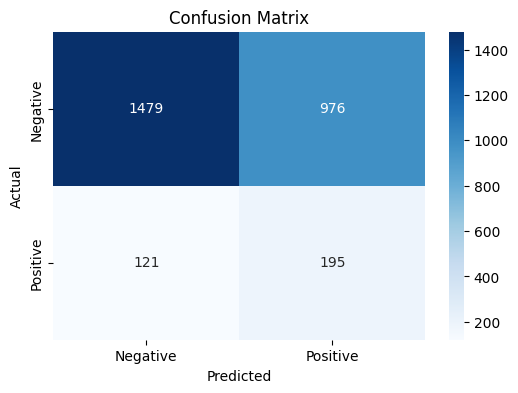

In [50]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = pipeline_simple_logistic.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [51]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe # <-- Use imblearn's Pipeline

pipeline_smote_logistic = pipe([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('smote', SMOTE(random_state=42)),  # <-- Add SMOTE here
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

In [52]:
pipeline_smote_logistic.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x30f18f1a0>)),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=100)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

Accuracy: 0.6499
Precision: 0.1909
Recall: 0.6392
F1 Score: 0.2940


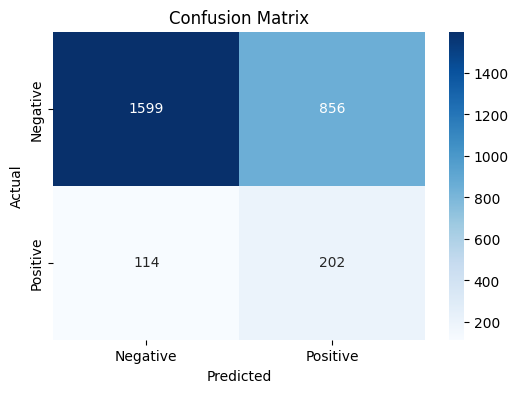

In [53]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = pipeline_smote_logistic.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
from xgboost import XGBClassifier

pipeline_xgb_opti = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', XGBClassifier(n_estimators = 100, objective = 'binary:logistic', scale_pos_weight = 99, max_delta_step = 1))
])

In [55]:
pipeline_xgb_opti.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

Accuracy: 0.5857
Precision: 0.1492
Recall: 0.5601
F1 Score: 0.2357


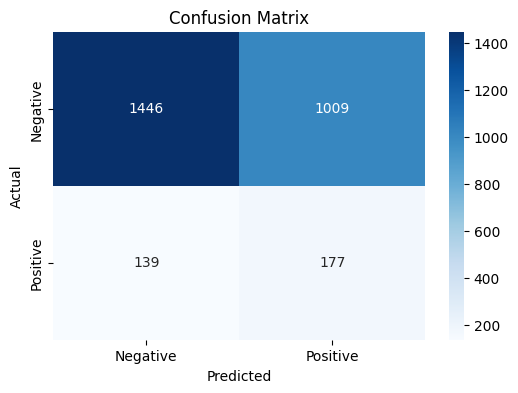

In [56]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = pipeline_xgb_opti.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [57]:
from imblearn.ensemble import BalancedRandomForestClassifier

pipeline_balancedrf = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', BalancedRandomForestClassifier())
])

In [59]:
pipeline_balancedrf.fit(X_train1,y_train1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['drg_mortality']),
                                                 ('age', StandardScaler(),
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x31255eac0>)),
                ('pca', PCA(n_components=100)),
                ('classifier', BalancedRandomForestClassifier())])

Accuracy: 0.7766
Precision: 0.1770
Recall: 0.2627
F1 Score: 0.2115


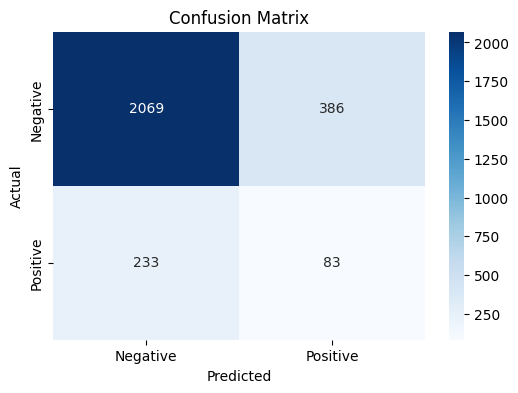

In [60]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = pipeline_balancedrf.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1)
recall = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [61]:
# Treat imbalanced dataset for better results.
# check pipeline again and try to modify it

In [62]:
import joblib
#joblib.dump(pipeline, 'readmission_yes_no_pipeline.joblib')

<h3>Keeping only readmitted people</h3>

In [63]:

new_df = df[(df['days_to_readmit'].notnull())]

y2 = new_df['readmit_within_30']
x2 = new_df.drop(columns = ['days_to_readmit','readmit_within_30'])

In [64]:
x2.describe()

,drg_code,drg_severity,drg_mortality,age
count,4211.000000,4211.000000,4211.000000,4211.000000
mean,2080.797435,3.644740,3.487058,69.275232
std,2196.437658,0.554946,0.689942,11.918169
min,1.000000,1.000000,1.000000,20.000000
25%,454.000000,3.000000,3.000000,62.000000
50%,1653.000000,4.000000,4.000000,72.000000
75%,2414.000000,4.000000,4.000000,78.000000
max,9524.000000,4.000000,4.000000,110.000000


In [65]:
y2.value_counts()

readmit_within_30
0    2576
1    1635
Name: count, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.2)

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

pipeline_crop_logistic = pipe([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
    ('smote', SMOTE(random_state=42)),  # <-- Add SMOTE here
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(class_weight='balanced'))
])

In [68]:
pipeline_crop_logistic.fit(X_train2,y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x312940b80>)),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=100)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

Accuracy: 0.6157
Precision: 0.5049
Recall: 0.6280
F1 Score: 0.5598


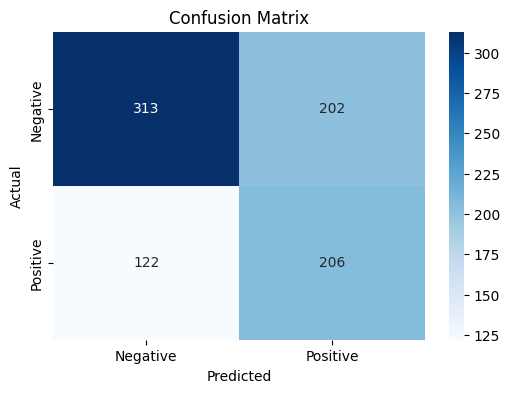

In [69]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred2 = pipeline_crop_logistic.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [98]:
from xgboost import XGBClassifier

crop_pipeline_xgb_opti = pipe([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
        ('smote', SMOTE(random_state=42)),
    ('pca', PCA(n_components=100)),
    ('classifier', XGBClassifier(n_estimators = 100, objective = 'binary:logistic', scale_pos_weight = 99, max_delta_step = 1))
])

In [99]:
crop_pipeline_xgb_opti.fit(X_train2,y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

Accuracy: 0.5065
Precision: 0.4343
Recall: 0.8872
F1 Score: 0.5832


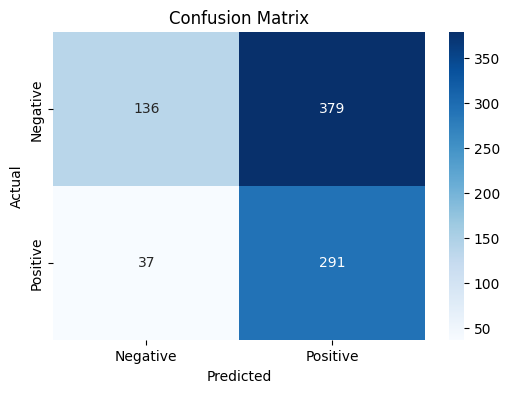

In [100]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred2 = crop_pipeline_xgb_opti.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [101]:
from imblearn.ensemble import BalancedRandomForestClassifier

crop_pipeline_balancedrf = pipe([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', BalancedRandomForestClassifier())
])

In [102]:
crop_pipeline_balancedrf.fit(X_train2,y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['drg_mortality']),
                                                 ('age', StandardScaler(),
                                                  ['age']),
                                                 ('procedure_pairs',
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x31b4bbe20>)),
                ('pca', PCA(n_components=100)),
                ('classifier', BalancedRandomForestClassifier())])

Accuracy: 0.6382
Precision: 0.5412
Recall: 0.4604
F1 Score: 0.4975


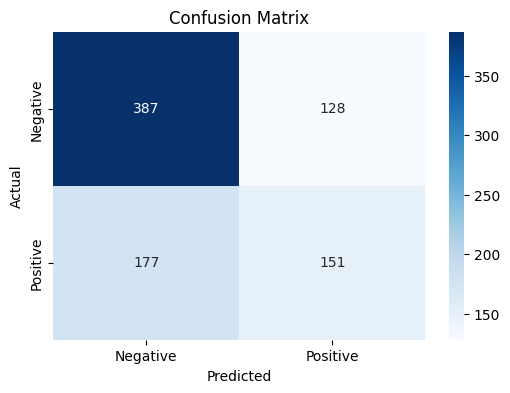

In [103]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred2 = crop_pipeline_balancedrf.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Infered kowledge from above model trials
As data for people who doesn't get a readmission is very high, we need to consider only those patients who have taken readmission or died within 30 days after a discharge

In [106]:
new_df = df[(df['days_to_readmit'].notnull())]

y_final = new_df['readmit_within_30']
x_final = new_df.drop(columns = ['days_to_readmit','readmit_within_30'])

In [109]:
y_final.value_counts()

readmit_within_30
0    2576
1    1635
Name: count, dtype: int64

In [107]:
X_train,X_test,y_train,y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

<h3>Best model with highest f1 score</h3>

In [110]:
import optuna
from sklearn.pipeline import Pipeline as pipe
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Stratified CV to respect class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

imbalance_ratio = 2576 / 1635  # From your y.value_counts()

def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['XGBoost', 'LightGBM', 'BalancedRF', 'SVM', 'LogisticRegression'])

    if classifier_name == 'XGBoost':
        model = XGBClassifier(
            n_estimators=trial.suggest_int('xgb_n_estimators', 50, 300),
            max_depth=trial.suggest_int('xgb_max_depth', 3, 15),
            learning_rate=trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
            subsample=trial.suggest_float('xgb_subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
            gamma=trial.suggest_float('xgb_gamma', 0, 5),
            reg_alpha=trial.suggest_float('xgb_reg_alpha', 0.0, 1.0),
            reg_lambda=trial.suggest_float('xgb_reg_lambda', 0.0, 1.0),
            scale_pos_weight=imbalance_ratio,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )

    elif classifier_name == 'LightGBM':
        model = LGBMClassifier(
            n_estimators=trial.suggest_int('lgb_n_estimators', 50, 300),
            learning_rate=trial.suggest_float('lgb_learning_rate', 0.01, 0.3, log=True),
            num_leaves=trial.suggest_int('lgb_num_leaves', 20, 150),
            max_depth=trial.suggest_int('lgb_max_depth', 3, 15),
            subsample=trial.suggest_float('lgb_subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('lgb_colsample_bytree', 0.6, 1.0),
            reg_alpha=trial.suggest_float('lgb_reg_alpha', 0.0, 1.0),
            reg_lambda=trial.suggest_float('lgb_reg_lambda', 0.0, 1.0),
            class_weight='balanced',
            random_state=42
        )

    elif classifier_name == 'BalancedRF':
        model = BalancedRandomForestClassifier(
            n_estimators=trial.suggest_int('rf_n_estimators', 50, 300),
            max_depth=trial.suggest_int('rf_max_depth', 3, 20),
            min_samples_split=trial.suggest_int('rf_min_samples_split', 2, 10),
            min_samples_leaf=trial.suggest_int('rf_min_samples_leaf', 1, 10),
            max_features=trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None]),
            random_state=42
        )

    elif classifier_name == 'SVM':
        model = SVC(
            C=trial.suggest_float('svm_C', 0.1, 100, log=True),
            kernel=trial.suggest_categorical('svm_kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
            gamma=trial.suggest_categorical('svm_gamma', ['scale', 'auto']),
            probability=True,
            class_weight='balanced',
            random_state=42
        )

    elif classifier_name == 'LogisticRegression':
        model = LogisticRegression(
            C=trial.suggest_float('logreg_C', 0.01, 10, log=True),
            penalty=trial.suggest_categorical('logreg_penalty', ['l1', 'l2']),
            solver=trial.suggest_categorical('logreg_solver', ['liblinear', 'saga']),
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )

    # Full pipeline
    pipeline = pipe([
        ('preprocessor', preprocessor),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # PCA needs dense
        ('pca', PCA(n_components=100)),
        ('classifier', model)
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1).mean()
    return score

In [111]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)  

[I 2025-05-25 20:47:28,247] A new study created in memory with name: no-name-c7a19339-bc85-42bc-9987-43183f849ae5
/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:47:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-25 20:47:43,294] Trial 6 finished with value: 0.5561567216813721 and parameters: {'classifier': 'SVM', 'svm_C': 17.390508824229357, 'svm_kernel': 'rbf', 'svm_gamma': 'auto'}. Best is trial 6 with value: 0.5561567216813721.
[I 2025-05-25 20:47:44,408] Trial 0 finished with value: 0.5032931390940217 and parameters: {'classifier': 'BalancedRF', 'rf_n_estimators': 254,

[LightGBM] [Info] Number of positive: 867, number of negative: 1378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 2245, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 20:52:31,054] Trial 57 finished with value: 0.4596724772915577 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 57, 'lgb_learning_rate': 0.2748523610909625, 'lgb_num_leaves': 150, 'lgb_max_depth': 9, 'lgb_subsample': 0.90713491274294, 'lgb_colsample_bytree': 0.9802296413624048, 'lgb_reg_alpha': 0.007078519087348023, 'lgb_reg_lambda': 0.9839927962711261}. Best is trial 44 with value: 0.5724178681643654.
[I 2025-05-25 20:52:33,392] Trial 59 finished with value: 0.5681153897235206 and parameters: {'classifier': 'LogisticRegression', 'logreg_C': 0.8027738718083743, 'logreg_penalt

In [122]:
best_trial = study.best_trial
print("Best trial parameters:", best_trial.params)
print("Best trial accuracy:", best_trial.value)

Best trial parameters: {'classifier': 'LogisticRegression', 'logreg_C': 0.6194990164033582, 'logreg_penalty': 'l2', 'logreg_solver': 'liblinear'}
Best trial accuracy: 0.5732760777682941


In [149]:
final_pipeline_bestf1score = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(C=0.6194990164033582,
                                        penalty='l2',
                                        solver='liblinear',
                                        class_weight='balanced',
                                        max_iter=1000,
                                        random_state=42
                                     ))
])

In [150]:
final_pipeline_bestf1score.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x3296c8b80>)),
                ('pca', PCA(n_components=100)),
                ('classifier',
                 LogisticRegression(C=0.6194990164033582,
                                    class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

Accuracy: 0.6335
Precision: 0.5321
Recall: 0.6198
F1 Score: 0.5726
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.64      0.68       509
           1       0.53      0.62      0.57       334

    accuracy                           0.63       843
   macro avg       0.63      0.63      0.63       843
weighted avg       0.65      0.63      0.64       843



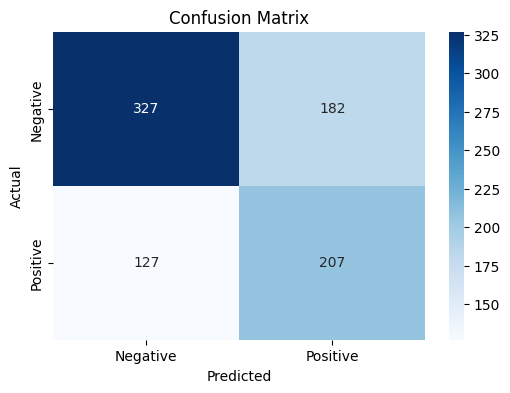

In [151]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = final_pipeline_bestf1score.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Classification Report: ',classification_report(y_test,y_pred))
    
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<h3>model with highest accuracy</h3>

In [126]:
import optuna
from sklearn.pipeline import Pipeline as pipe
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Stratified CV to respect class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

imbalance_ratio = 2576 / 1635  # From your y.value_counts()

def objective_highaccuracy(trial):
    classifier_name = trial.suggest_categorical('classifier', ['XGBoost', 'LightGBM', 'BalancedRF', 'SVM', 'LogisticRegression'])

    if classifier_name == 'XGBoost':
        model = XGBClassifier(
            n_estimators=trial.suggest_int('xgb_n_estimators', 50, 300),
            max_depth=trial.suggest_int('xgb_max_depth', 3, 15),
            learning_rate=trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
            subsample=trial.suggest_float('xgb_subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
            gamma=trial.suggest_float('xgb_gamma', 0, 5),
            reg_alpha=trial.suggest_float('xgb_reg_alpha', 0.0, 1.0),
            reg_lambda=trial.suggest_float('xgb_reg_lambda', 0.0, 1.0),
            scale_pos_weight=imbalance_ratio,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )

    elif classifier_name == 'LightGBM':
        model = LGBMClassifier(
            n_estimators=trial.suggest_int('lgb_n_estimators', 50, 300),
            learning_rate=trial.suggest_float('lgb_learning_rate', 0.01, 0.3, log=True),
            num_leaves=trial.suggest_int('lgb_num_leaves', 20, 150),
            max_depth=trial.suggest_int('lgb_max_depth', 3, 15),
            subsample=trial.suggest_float('lgb_subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('lgb_colsample_bytree', 0.6, 1.0),
            reg_alpha=trial.suggest_float('lgb_reg_alpha', 0.0, 1.0),
            reg_lambda=trial.suggest_float('lgb_reg_lambda', 0.0, 1.0),
            class_weight='balanced',
            random_state=42
        )

    elif classifier_name == 'BalancedRF':
        model = BalancedRandomForestClassifier(
            n_estimators=trial.suggest_int('rf_n_estimators', 50, 300),
            max_depth=trial.suggest_int('rf_max_depth', 3, 20),
            min_samples_split=trial.suggest_int('rf_min_samples_split', 2, 10),
            min_samples_leaf=trial.suggest_int('rf_min_samples_leaf', 1, 10),
            max_features=trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None]),
            random_state=42
        )

    elif classifier_name == 'SVM':
        model = SVC(
            C=trial.suggest_float('svm_C', 0.1, 100, log=True),
            kernel=trial.suggest_categorical('svm_kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
            gamma=trial.suggest_categorical('svm_gamma', ['scale', 'auto']),
            probability=True,
            class_weight='balanced',
            random_state=42
        )

    elif classifier_name == 'LogisticRegression':
        model = LogisticRegression(
            C=trial.suggest_float('logreg_C', 0.01, 10, log=True),
            penalty=trial.suggest_categorical('logreg_penalty', ['l1', 'l2']),
            solver=trial.suggest_categorical('logreg_solver', ['liblinear', 'saga']),
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )

    # Full pipeline
    pipeline = pipe([
        ('preprocessor', preprocessor),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # PCA needs dense
        ('pca', PCA(n_components=100)),
        ('classifier', model)
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1).mean()
    return score

In [127]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective_highaccuracy, n_trials=100, n_jobs=-1)  

[I 2025-05-25 21:39:58,241] A new study created in memory with name: no-name-be331f87-a08c-4755-9825-cf19014440e9
[I 2025-05-25 21:40:13,328] Trial 3 finished with value: 0.6113402105492619 and parameters: {'classifier': 'SVM', 'svm_C': 5.7126546376630225, 'svm_kernel': 'rbf', 'svm_gamma': 'scale'}. Best is trial 3 with value: 0.6113402105492619.
[I 2025-05-25 21:40:22,974] Trial 6 finished with value: 0.6273710865927095 and parameters: {'classifier': 'SVM', 'svm_C': 14.910200382533024, 'svm_kernel': 'rbf', 'svm_gamma': 'auto'}. Best is trial 6 with value: 0.6273710865927095.
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3

[LightGBM] [Info] Number of positive: 867, number of negative: 1378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 2245, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:49:13,988] Trial 79 finished with value: 0.6312335020626886 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 116, 'lgb_learning_rate': 0.016477144961553926, 'lgb_num_leaves': 105, 'lgb_max_

[LightGBM] [Info] Number of positive: 867, number of negative: 1378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 2245, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:49:21,786] Trial 80 finished with value: 0.633012858668927 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 121, 'lgb_learning_rate': 0.015171187439961547, 'lgb_num_leaves': 106, 'lgb_max_depth': 15, 'lgb_subsample': 0.887299392373818, 'lgb_colsample_bytree': 0.7208472365282041, 'lgb_reg_alpha': 0.41476382973542986, 'lgb_reg_lambda': 0.21779489332411922}. Best is trial 9 with value: 0.6431141333189418.


[LightGBM] [Info] Number of positive: 868, number of negative: 1378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 2246, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:49:38,000] Trial 82 finished with value: 0.6347930089221797 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 129, 'lgb_learning_rate': 0.020935169645590963, 'lgb_num_leaves': 106, 'lgb_max_depth': 15, 'lgb_subsample': 0.8871182599499804, 'lgb_colsample_bytree': 0.7040040026095394, 'lgb_reg_alpha': 0.48950539765490597, 'lgb_reg_lambda': 0.22619962815427608}. Best is trial 9 with val

[LightGBM] [Info] Number of positive: 867, number of negative: 1378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 2245, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 867, number of negative: 1378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 2245, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:49:58,599] Trial 81 finished with value: 0.6460797276626725 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 295, 'lgb_learning_rate': 0.014024174435894812, 'lgb_num_leaves': 108, 'lgb_max_depth': 15, 'lgb_subsample': 0.8543154166948009, 'lgb_colsample_bytree': 0.7267176486488348, 'lgb_reg_alpha': 0.3793851203658346, 'lgb_reg_lambda': 0.20034567711579385}. Best is trial 81 with value: 0.6460797276626725.
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:50:01,449] Trial 83 finished with value: 0.632720002920621 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 120, 'lgb_learning_rate': 0.0172

[LightGBM] [Info] Number of positive: 867, number of negative: 1378
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 2245, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:50:31,090] Trial 86 finished with value: 0.6481585537423366 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 185, 'lgb_learning_rate': 0.01879702247903409, 'lgb_num_leaves': 66, 'lgb_max_depth': 9, 'lgb_subsample': 0.7695686942792638, 'lgb_colsample_bytree': 0.6462754218452514, 'lgb_reg_alpha': 0.7121295136260265, 'lgb_reg_lambda': 0.30261363942454894}. Best is trial 86 with value:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:52:21,98

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:52:37,645] Trial 97 finished with value: 0.6279655282064794 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 270, 'lgb_learning_rate': 0.011171896677810494, 'lgb_num_leaves': 91, 'lgb_max_depth': 7, 'lgb_subsample': 0.737458886846867, 'lgb_colsample_bytree': 0.641630386903662, 'lgb_reg_alpha': 0.6186464668518901, 'lgb_reg_lambda': 0.1346475231585371}. Best is trial 86 with value: 0.6481585537423366.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:52:43,910] Trial 99 finished with value: 0.6422162539966741 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 269, 'lgb_learning_rate': 0.010824094577241832, 'lgb_num_leaves': 49, 'lgb_max_d

In [128]:
best_trial_highestaccuracy = study2.best_trial
print("Best trial parameters:", best_trial_highestaccuracy.params)
print("Best trial accuracy:", best_trial_highestaccuracy.value)

Best trial parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 185, 'lgb_learning_rate': 0.01879702247903409, 'lgb_num_leaves': 66, 'lgb_max_depth': 9, 'lgb_subsample': 0.7695686942792638, 'lgb_colsample_bytree': 0.6462754218452514, 'lgb_reg_alpha': 0.7121295136260265, 'lgb_reg_lambda': 0.30261363942454894}
Best trial accuracy: 0.6481585537423366


In [133]:
final_pipeline_bestaccuracy = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', LGBMClassifier(n_estimators=185,
                                    learning_rate=0.01879702247903409,
                                    num_leaves=66,
                                    max_depth=9,
                                    subsample=0.7695686942792638,
                                    colsample_bytree=0.6462754218452514,
                                    reg_alpha=0.7121295136260265,
                                    reg_lambda=0.30261363942454894,
                                    class_weight='balanced',     # handle imbalance
                                    random_state=42,
                                    n_jobs=-1))

])

In [135]:
final_pipeline_bestaccuracy.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1301, number of negative: 2067
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 3368, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                     func=<function <lambda> at 0x328661260>)),
                ('pca', PCA(n_components=100)),
                ('classifier',
                 LGBMClassifier(class_weight='balanced',
                                colsample_bytree=0.6462754218452514,
                                learning_rate=0.01879702247903409, max_depth=9,
                                n_estimators=185, n_jobs=-1, num_leaves=66,
                                random_state=42, reg_alpha=0.7121295136260265,
                                reg_lambda=0.30261363942454894,
                                subsample=0.7695686942792638))])

Accuracy: 0.6263
Precision: 0.5307
Recall: 0.4910
F1 Score: 0.5101
Classification Report:                precision    recall  f1-score   support

           0       0.68      0.72      0.70       509
           1       0.53      0.49      0.51       334

    accuracy                           0.63       843
   macro avg       0.61      0.60      0.60       843
weighted avg       0.62      0.63      0.62       843



/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


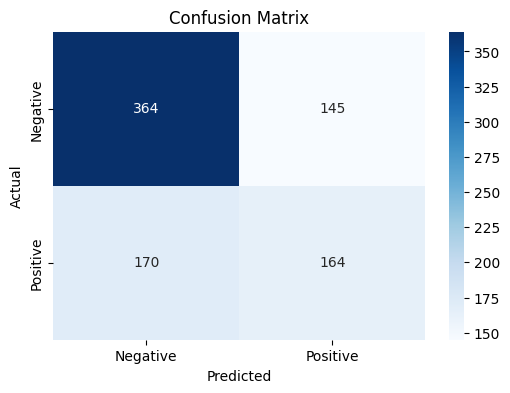

In [142]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = final_pipeline_bestaccuracy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Classification Report: ',classification_report(y_test,y_pred))
    
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<h3>model with highest recall</h3>

In [137]:
import optuna
from sklearn.pipeline import Pipeline as pipe
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Stratified CV to respect class distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

imbalance_ratio = 2576 / 1635  # From your y.value_counts()

def objective_highrecall(trial):
    classifier_name = trial.suggest_categorical('classifier', ['XGBoost', 'LightGBM', 'BalancedRF', 'SVM', 'LogisticRegression'])

    if classifier_name == 'XGBoost':
        model = XGBClassifier(
            n_estimators=trial.suggest_int('xgb_n_estimators', 50, 300),
            max_depth=trial.suggest_int('xgb_max_depth', 3, 15),
            learning_rate=trial.suggest_float('xgb_learning_rate', 0.01, 0.3, log=True),
            subsample=trial.suggest_float('xgb_subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('xgb_colsample_bytree', 0.6, 1.0),
            gamma=trial.suggest_float('xgb_gamma', 0, 5),
            reg_alpha=trial.suggest_float('xgb_reg_alpha', 0.0, 1.0),
            reg_lambda=trial.suggest_float('xgb_reg_lambda', 0.0, 1.0),
            scale_pos_weight=imbalance_ratio,
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )

    elif classifier_name == 'LightGBM':
        model = LGBMClassifier(
            n_estimators=trial.suggest_int('lgb_n_estimators', 50, 300),
            learning_rate=trial.suggest_float('lgb_learning_rate', 0.01, 0.3, log=True),
            num_leaves=trial.suggest_int('lgb_num_leaves', 20, 150),
            max_depth=trial.suggest_int('lgb_max_depth', 3, 15),
            subsample=trial.suggest_float('lgb_subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('lgb_colsample_bytree', 0.6, 1.0),
            reg_alpha=trial.suggest_float('lgb_reg_alpha', 0.0, 1.0),
            reg_lambda=trial.suggest_float('lgb_reg_lambda', 0.0, 1.0),
            class_weight='balanced',
            random_state=42
        )

    elif classifier_name == 'BalancedRF':
        model = BalancedRandomForestClassifier(
            n_estimators=trial.suggest_int('rf_n_estimators', 50, 300),
            max_depth=trial.suggest_int('rf_max_depth', 3, 20),
            min_samples_split=trial.suggest_int('rf_min_samples_split', 2, 10),
            min_samples_leaf=trial.suggest_int('rf_min_samples_leaf', 1, 10),
            max_features=trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None]),
            random_state=42
        )

    elif classifier_name == 'SVM':
        model = SVC(
            C=trial.suggest_float('svm_C', 0.1, 100, log=True),
            kernel=trial.suggest_categorical('svm_kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
            gamma=trial.suggest_categorical('svm_gamma', ['scale', 'auto']),
            probability=True,
            class_weight='balanced',
            random_state=42
        )

    elif classifier_name == 'LogisticRegression':
        model = LogisticRegression(
            C=trial.suggest_float('logreg_C', 0.01, 10, log=True),
            penalty=trial.suggest_categorical('logreg_penalty', ['l1', 'l2']),
            solver=trial.suggest_categorical('logreg_solver', ['liblinear', 'saga']),
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )

    # Full pipeline
    pipeline = pipe([
        ('preprocessor', preprocessor),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # PCA needs dense
        ('pca', PCA(n_components=100)),
        ('classifier', model)
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1).mean()
    return score

In [138]:
study3 = optuna.create_study(direction='maximize')
study3.optimize(objective_highrecall, n_trials=100, n_jobs=-1)  

[I 2025-05-25 21:55:52,546] A new study created in memory with name: no-name-afab68d1-021a-4a97-b7f4-fbd23ee98cfe
[I 2025-05-25 21:56:02,539] Trial 2 finished with value: 0.6033939613243793 and parameters: {'classifier': 'LogisticRegression', 'logreg_C': 0.023486499491784097, 'logreg_penalty': 'l1', 'logreg_solver': 'liblinear'}. Best is trial 2 with value: 0.6033939613243793.
[I 2025-05-25 21:56:02,602] Trial 0 finished with value: 0.6356750850530184 and parameters: {'classifier': 'LogisticRegression', 'logreg_C': 0.32613966491079294, 'logreg_penalty': 'l2', 'logreg_solver': 'saga'}. Best is trial 0 with value: 0.6356750850530184.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-05-25 21:56:22,104] Trial 6 finished with value: 0.5011671509101294 and parameters: {'classifier': 'BalancedRF', 'rf_n_estimators': 178, 'rf_max_depth': 16, 'rf_min_samples_split': 6, 'rf_min_samples_leaf': 10, 'rf_max_features': 'log2'}. Best is trial 0 with value: 0.6356750850530184.
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-05-25 21:56:32,509] Trial 1 finished with value: 0.415855159764867 and parameters: {'classifier': 'LightGBM', 'l

In [139]:
best_trial_highrecall = study3.best_trial
print("Best trial parameters:", best_trial_highrecall.params)
print("Best trial accuracy:", best_trial_highrecall.value)

Best trial parameters: {'classifier': 'SVM', 'svm_C': 0.1165913491018859, 'svm_kernel': 'poly', 'svm_gamma': 'auto'}
Best trial accuracy: 1.0


In [145]:
final_pipeline_bestrecall = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),  # Ensures PCA works
    ('pca', PCA(n_components=100)),
    ('classifier', SVC(
                        C=0.1165913491018859,
                        kernel='poly',
                        gamma='auto',
                        class_weight='balanced',   
                        probability=True,          
                        random_state=42
                    ))
])

In [146]:
final_pipeline_bestrecall.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  TfidfWrapper(),
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x3296cbf60>)),
                ('pca', PCA(n_components=100)),
                ('classifier',
                 SVC(C=0.1165913491018859, class_weight='balanced',
                     gamma='auto', kernel='poly', probability=True,
                     random_state=42))])

Accuracy: 0.6038
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Classification Report:                precision    recall  f1-score   support

           0       0.60      1.00      0.75       509
           1       0.00      0.00      0.00       334

    accuracy                           0.60       843
   macro avg       0.30      0.50      0.38       843
weighted avg       0.36      0.60      0.45       843



/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packag

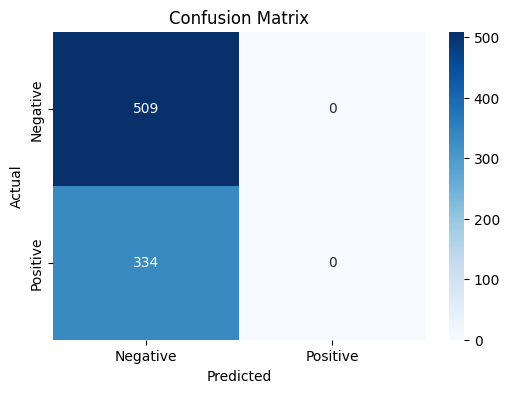

In [148]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = final_pipeline_bestrecall.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Classification Report: ',classification_report(y_test,y_pred))
    
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<h3> As we can see best model is of highest f1_score. Using it...</h3>

In [162]:
def to_dense(x):
    return x.toarray()
    
final_pipeline_bestf1score = Pipeline([
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(to_dense, accept_sparse=True)),
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(
        C=0.6194990164033582,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    ))
])

In [163]:
final_pipeline_bestf1score.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('admission_type',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['admission_type']),
                                                 ('discharge_location',
                                                  TargetEncoder(),
                                                  ['discharge_location']),
                                                 ('ethnicity', TargetEncoder(),
                                                  ['ethnicity']),
                                                 ('cpt_cd', TfidfWrapper(),
                                                  ['cpt_cd']),
                                                 ('all_diagnosis',
                                                  TfidfWrapper(),
                                                  ['all_diagnosi...
                                                  ['procedure_pairs']),
                                                 ('lab_events', TfidfWrapper(),
                                                  ['lab_events'])],
                                   verbose_feature_names_out=False)),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function to_dense at 0x349c0cc20>)),
                ('pca', PCA(n_components=100)),
                ('classifier',
                 LogisticRegression(C=0.6194990164033582,
                                    class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

Accuracy: 0.6346
Precision: 0.5327
Recall: 0.6347
F1 Score: 0.5792
Classification Report:                precision    recall  f1-score   support

           0       0.73      0.63      0.68       509
           1       0.53      0.63      0.58       334

    accuracy                           0.63       843
   macro avg       0.63      0.63      0.63       843
weighted avg       0.65      0.63      0.64       843



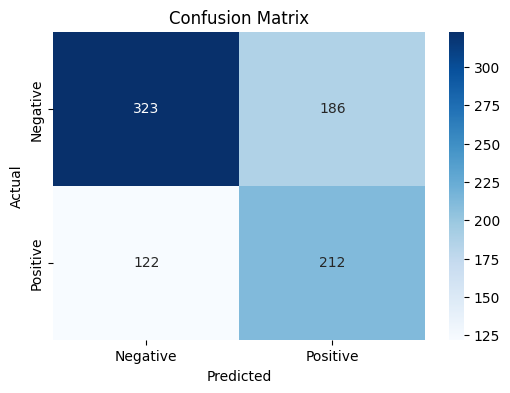

In [164]:
# Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = final_pipeline_bestf1score.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Classification Report: ',classification_report(y_test,y_pred))
    
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [165]:
# keeping it in joblib file
import joblib
joblib.dump(final_pipeline_bestf1score, 'readmission_yes_no_pipeline.joblib')

['readmission_yes_no_pipeline.joblib']